In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
df = pd.read_csv('data-1691976821292.csv')
df.head(3)

,description,total_amount
0,A Fateful Yarn of a Husband And a Dog who must...,215.75
1,A Intrepid Panorama of a Mad Scientist And a B...,199.72
2,A Awe-Inspiring Epistle of a Teacher And a Fem...,198.73


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   958 non-null    object 
 1   total_amount  958 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.1+ KB


In [8]:
df = pd.read_csv('data-1691976821292.csv')

In [9]:
df.shape
(34660, 21)

df.columns

Index(['description', 'total_amount'], dtype='object')

In [14]:
df = pd.DataFrame(df.drop('total_amount', axis=1, inplace=False))

<Axes: >

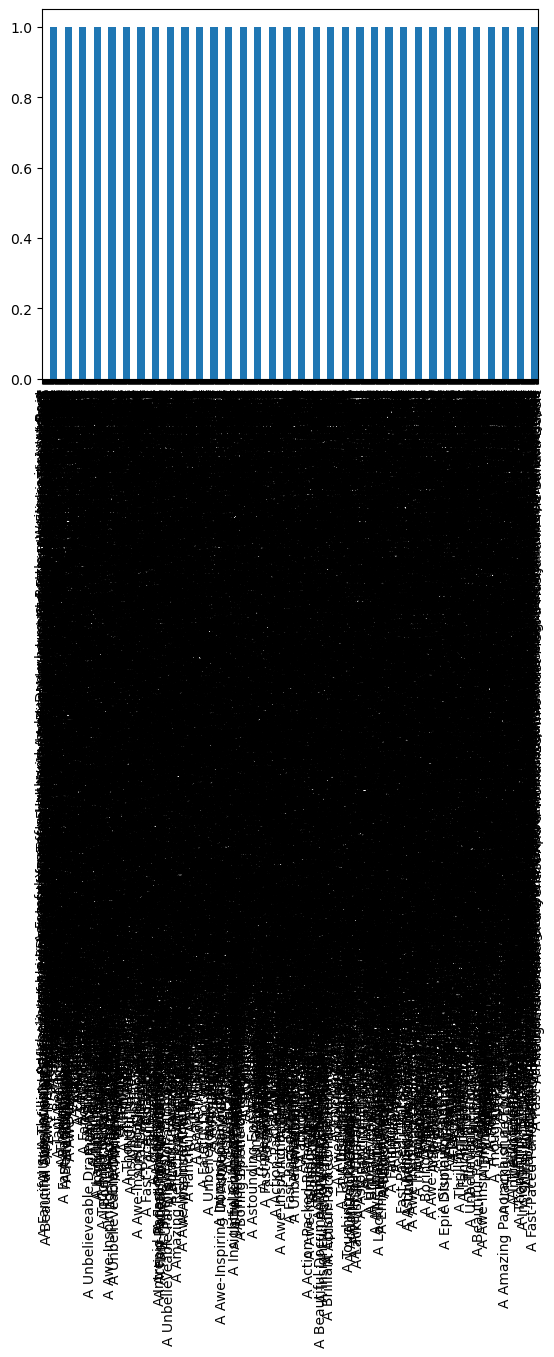

In [23]:
df['description'].value_counts().plot(kind='bar')

In [24]:
def senti(x):
    return TextBlob(x).sentiment  


In [26]:
df['senti_score'] = df['description'].apply(senti)


In [27]:
df.senti_score.head()

0        (-0.1, 0.2)
1      (-0.625, 1.0)
2         (0.0, 0.0)
3        (0.85, 1.0)
4    (-0.025, 0.325)
Name: senti_score, dtype: object

In [39]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lola.ly/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
df = pd.read_csv('data-1691976821292.csv')
df["total_amount"] = df.index + 1
print (df.head(10))

                                         description  total_amount
0  A Fateful Yarn of a Husband And a Dog who must...             1
1  A Intrepid Panorama of a Mad Scientist And a B...             2
2  A Awe-Inspiring Epistle of a Teacher And a Fem...             3
3  A Beautiful Drama of a Pioneer And a Crocodile...             4
4  A Emotional Reflection of a Sumo Wrestler And ...             5
5  A Thoughtful Reflection of a Mad Scientist And...             6
6  A Unbelieveable Panorama of a Feminist And a S...             7
7  A Taut Yarn of a Technical Writer And a Femini...             8
8  A Emotional Display of a Crocodile And a Husba...             9
9  A Brilliant Character Study of a Database Admi...            10


In [42]:

df_subset = df[['total_amount', 'description']].copy()
df_subset['description'] = df_subset['description'].str.replace("Fateful", "Thoughtful")
df_subset['description'] = df_subset['description'].str.casefold()

In [43]:
df1=pd.DataFrame()
df1['total_amount']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [44]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['total_amount']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.total_amount != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...


/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

   total_amount sentiment_type  sentiment_score
0             1       compound           0.0000
0             2       compound          -0.4939
0             3       compound          -0.1779
0             4       compound           0.6369
0             5       compound           0.1531
0             6       compound          -0.7430
0             7       compound           0.0772
0             8       compound           0.0000
0             9       compound           0.1779
0            10       compound           0.5859


/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc0000gn/T/ipykernel_17179/3586278765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
/var/folders/m8/rrtsbsqd2tddptjykwl33klc

In [45]:
df_output = pd.merge(df, t_df_cleaned, on='total_amount', how='inner')
print(df_output.head(20))

                                          description  total_amount  \
0   A Fateful Yarn of a Husband And a Dog who must...             1   
1   A Intrepid Panorama of a Mad Scientist And a B...             2   
2   A Awe-Inspiring Epistle of a Teacher And a Fem...             3   
3   A Beautiful Drama of a Pioneer And a Crocodile...             4   
4   A Emotional Reflection of a Sumo Wrestler And ...             5   
5   A Thoughtful Reflection of a Mad Scientist And...             6   
6   A Unbelieveable Panorama of a Feminist And a S...             7   
7   A Taut Yarn of a Technical Writer And a Femini...             8   
8   A Emotional Display of a Crocodile And a Husba...             9   
9   A Brilliant Character Study of a Database Admi...            10   
10  A Epic Documentary of a Boy And a Monkey who m...            11   
11  A Unbelieveable Tale of a Dog And a Explorer w...            12   
12  A Lacklusture Tale of a Crocodile And a Compos...            13   
13  A 

In [46]:
df_output[["sentiment_score"]].describe()


,sentiment_score
count,958.000000
mean,-0.017934
std,0.367858
min,-0.897900
25%,-0.318200
50%,0.000000
75%,0.250000
max,0.670500


   total_amount sentiment_type  sentiment_score
0             1       compound           0.0000
0             2       compound          -0.4939
0             3       compound          -0.1779
0             4       compound           0.6369
0             5       compound           0.1531
0             6       compound          -0.7430
0             7       compound           0.0772
0             8       compound           0.0000
0             9       compound           0.1779
0            10       compound           0.5859


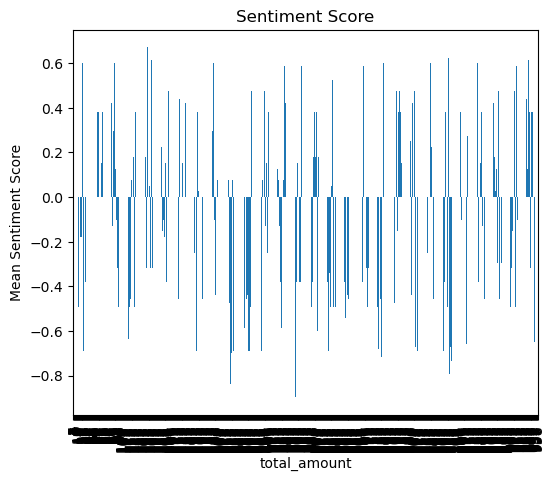

In [47]:
dfg = df_output.groupby(['total_amount'])['sentiment_score'].mean()
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='total_amount', figsize=(6, 5))
print(t_df_cleaned.head(10))